In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# python 머신러닝 패키지
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.5/11.0 MB 30.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.0 MB 32.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.0 MB 31.9 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 34.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.5/11.0 MB 36.4 MB/s eta 0:00:01
   ------------------------------------- -- 10.4/11.0 MB 38.6 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 38.5 MB/s eta 0:00:01
   ----------------------

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 결측치 찾기 .isna()

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
len(data)

891

결측치 / 전체데이터*100 = 결측의 비율

In [9]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## age와 cabin, embarked에 결측값이 발견되어 처리

### 1) 단순대치법(simple imputation)


* 완전분석 => 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석
* 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우에 사용해야 한다.
* 결측값을 삭제한 후에도 데이터에 편향이 없다는 전제가 있을 때 사용해야 한다.
* .dropna() => 결측값이 있는 모든 행 삭제

In [10]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
183 / 891 * 100

20.53872053872054

### 2) 평균 대치법: 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
* 평균을 이용하기 때문에 간편
* 데이터에 이상치가 있을 경우 평균을 이용할 수 없다.
* 데이터에 이상치가 있는 경우에는 중앙값이나 최빈값을 고려해야 한다

In [17]:
a = np.array([24, 5, 10, 34, 20, 18 , 28, 20])
a.mean()

np.float64(19.875)

In [16]:
b = np.array([24, 5, 10, 34, 20, 18 , 28, 200])
b.mean()

np.float64(42.375)

In [19]:
c = np.array([24, 5, 10, 34, 20, 18 , 28, 20])
np.median(c)

np.float64(20.0)

전체 데이터 프레임에서 Age컬럼에 결측값이 있는 행만 추출

In [22]:
data[data['Age'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


결측값이 있는 컬럼을 나중에 다시 확인하고 싶을 때 <br>
1. isna()==True로 결측값이 있는 컬럼 추출
2. 추출된 데이터 프레임의 index 추출 .index
3. 추출한 인덱스를 변수에 저장
4. 데이터프레임[index]로 조회

In [8]:
na_index = data[data['Age'].isna() ==True].index
na_index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [25]:
data.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* .fillna(대치할 값)로 평균 대치 하기

In [10]:
data_mean=data.copy()
data_median = data.copy()
data_mode = data.copy()

In [11]:
data_mean['Age']=data['Age'].fillna(round(data['Age'].mean()))

In [12]:
data_mean['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
data_mean.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,30.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,30.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,30.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,30.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,30.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,NaN,S


In [21]:
data_median['Age']=data['Age'].fillna(round(data['Age'].median()))

In [22]:
data_median.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,S


In [23]:
# 최빈값으로 대체하기

data['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [24]:
data_mode['Age']=data['Age'].fillna(24)

In [25]:
data_mode.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,S


In [ ]:
scikit-learn 라이브러리의 SimpleImputer: 평균, 중앙값, 최빈값 대치

In [3]:
from sklearn.impute import SimpleImputer

In [37]:
# 평균으로 대치 mean
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [38]:
# 최빈값 
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  ,
       31.  , 24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  ,
       19.  , 24.  , 24.  , 40.  , 24.  , 24.  , 66.  , 28.  , 42.  ,
       24.  , 21.  , 18.  , 14.  , 40.  , 27.  , 24.  ,  3.  , 19.  ,
       24.  , 24.  , 24.  , 24.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 24.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 21.  , 33.  , 37.  , 28.  , 21.  , 24.  ,
       38.  , 24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 24.  , 32.5 , 32.5 , 54.  , 12.  ,
       24.  , 24.  ,

* KNN(K-Nearest-Neighbors) 최근접이웃 대치법


In [4]:
from sklearn.impute import KNNImputer

In [5]:
data_knn=data.copy()

In [6]:
knn_imputer = KNNImputer(n_neighbors=5)
data_knn['Age']=knn_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

In [9]:
data_knn.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


## 깊은 복사 / 얕은 복사
* copy를 하면 새로운 데이터가 만들어진다는 느낌이고 
* =으로 할당하면 이름만 바뀌는 느낌
* copy를 사용해야 원본데이터를 망치지 않는다.

In [61]:
data_test=data.copy()

In [62]:
data_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
id(data_test2)

1747955376352

In [71]:
id(data_test)

1747955376352

In [63]:
data_test2=data_test

In [66]:
data_test2['Age']=data_test2['Age'].fillna(25)

In [67]:
data_test2.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S


In [68]:
data_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
data_test.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S


In [72]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin 컬럼은 결측값 비율이 77%라서 삭제

In [14]:
del data_mean['Cabin']

In [15]:
data_mean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
data_median = data_median.drop('Cabin', axis=1)

In [17]:
data_median

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [18]:
data_mode.drop('Cabin', axis=1, inplace=True)
data_mode

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
data_mode.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [27]:
# 명목형 자료, 범주형 자료
data_mode['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [28]:
data_mode['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
data_mode['Embarked'] = data_mode['Embarked'].fillna('S')

In [30]:
data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
data_mean['Embarked'] = data_mean['Embarked'].fillna('S')
data_median['Embarked'] = data_median['Embarked'].fillna('S')
data_knn['Embarked'] = data_knn['Embarked'].fillna('S')

In [32]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [33]:
data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data_knn.drop('Cabin', axis=1, inplace=True)

In [36]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 이상값
* 이상값이란 전체 데이터 분포에서 정상 범위에 속하지 않는 데이터
* z-score가 -3 -3 범위를 벗어나는 경우 - 이상값
* 평균을 기준으로 평균에서 표준편차 +- 3 을 넘는 값 = 이상값
* IQR(사분위수)기준 이상값
    * 하위 이상값: Q1(25%) - (1.5*IQR(Q3-Q1)) 을 넘어가는 값
    * 상위 이상값: Q3(75%) + (1.5*IQR(Q3-Q1)) 을 넘어가는 값

* 상자수염 그리고 이상값 탐지하기

<Axes: >

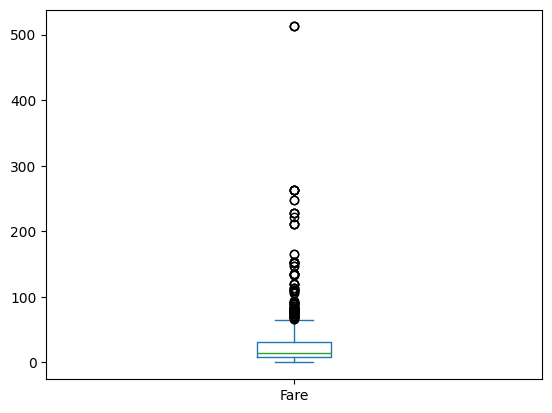

In [76]:
data['Fare'].plot(kind='box')

<Axes: >

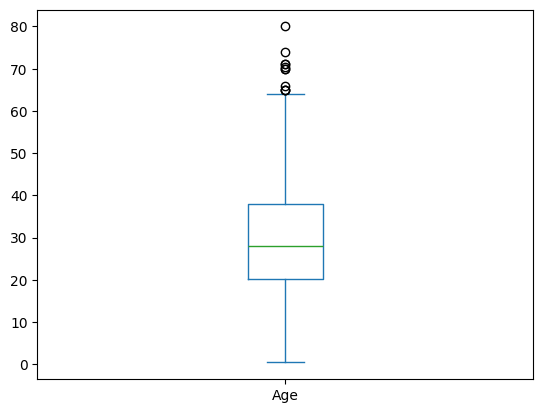

In [77]:
data['Age'].plot(kind='box')

In [78]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [79]:
# describe로 구한 Q1, Q3으로 이상치 범위 구하기
minimum=7.910400 - (1.5 *(31.000000-7.910400))
maximum=31.000000 + (1.5 * (31.000000-7.910400))
print("minimum: ",minimum)
print("maximum: ",maximum)


minimum:  -26.724
maximum:  65.6344


* 이상치를 초과하는 행 조회하기

In [80]:
data[data['Fare']> maximum]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [83]:
data[['Pclass','Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [86]:
data[data['Pclass']==1]['Fare'].mean(0)

np.float64(84.1546875)

In [89]:
data[data['Pclass']==1]['Fare'].info()

<class 'pandas.core.series.Series'>
Index: 216 entries, 1 to 889
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
216 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [37]:
# 상관관계 -1 0 1
data[['Pclass', 'Survived', 'Fare', 'Age']].corr()

,Pclass,Survived,Fare,Age
Pclass,1.000000,-0.338481,-0.549500,-0.369226
Survived,-0.338481,1.000000,0.257307,-0.077221
Fare,-0.549500,0.257307,1.000000,0.096067
Age,-0.369226,-0.077221,0.096067,1.000000


## EDA  탐색적 데이터 분석

### 범주형 자료를 숫자로 변환하기

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data=data.drop(['Name', 'Cabin'], axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [6]:
data['Ticket'].nunique()

681

In [7]:
data.drop('Ticket',axis=1, inplace=True)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


성별 컬럼을 숫자로 변환하기
* .str.replace를 사용해 숫자로 변환하기
* apply(lambda)를 사용해 숫자로 변환하기
* label encoder 를 사용해 숫자로 변환하기
* one-hot encoder를 사용해 숫자로 변환하기
* get_dummies를 사용해 더미변수화 하기

In [9]:
data1=data.copy()
data2=data.copy()
data3=data.copy()
data4=data.copy()
data5=data.copy()

### .str.replace를 사용해서 변환

In [10]:
data1['Sex']=data1['Sex'].str.replace("female",'1').str.replace("male",'0')
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,NaN,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
data1['Sex']=data1['Sex'].astype('int')

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [14]:
data1['Embarked']=data1['Embarked'].fillna('S')

In [15]:
data1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
data1['Embarked']=data1['Embarked'].str.replace("S","0").str.replace("C","1").str.replace("Q","2")

In [17]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [18]:
data1['Embarked']=data1['Embarked'].astype('int')

In [19]:
data1['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [20]:
data1['Age']=data1['Age'].fillna(data1['Age'].mean())

In [21]:
data1['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [23]:
X=data1.drop('Survived', axis=1)
y=data1['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [28]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
768,769,3,0,29.699118,1,0,24.1500,2
387,388,2,1,36.000000,0,0,13.0000,0
823,824,3,1,27.000000,0,1,12.4750,0
778,779,3,0,29.699118,0,0,7.7375,2
157,158,3,0,30.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
136,137,1,1,19.000000,0,2,26.2833,0
133,134,2,1,29.000000,1,0,26.0000,0
361,362,2,0,29.000000,1,0,27.7208,1
340,341,2,0,2.000000,1,1,26.0000,0


In [29]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
result=pd.DataFrame({"실제값: ": y_test, "예측값: ": pred})
result

,실제값:,예측값:
350,0,0
176,0,0
723,0,0
404,0,0
306,1,1
...,...,...
283,1,0
715,0,0
650,0,0
808,0,0


In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7094972067039106
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       108
           1       0.63      0.66      0.64        71

    accuracy                           0.71       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.71      0.71       179



apply 함수를 이용해서 data2의 범주형 변수를 명목형, 서열형 변수로 바꾸시오.

In [78]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [81]:
data2['Sex']=data2['Sex'].apply(lambda x : 1 if x=='female' else 0)

In [82]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [83]:
data2['Embarked']=data2['Embarked'].fillna('S')

In [90]:
data2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [92]:
def em2num(x):
    if x =='S':
        return 0
    elif x=='C':
        return 1
    else:
        return 2

In [93]:
data2['Embarked']=data2['Embarked'].apply(em2num)

In [94]:
data2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


# label encoder를 사용해 범주형 변수 변환하기
* from sklearn.preprocessing import LabelEncoder 임포트
* le = LabelEncoder() 레이블 인코더 인스턴스 생성
* data3['Sex']=le.fit_transform(data3['Sex']) Sex 컬럼안에 있는 카테고리 male과 female이 숫자 0,1로 변환
* le.inverse_transform([변환할 숫자]) 숫자로 변환된 것을 다시 문자로 되돌리고 싶을 때

* 변환할 카테고리 변수 수 만큼 인스턴스를 생성해야 나중에 복원 가능
* le => Sex 칼럼
* le2 => Embarked 칼럼

In [32]:
data3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test=le.fit(data3['Sex'])
le.classes_
result=le.transform(data3['Sex'])
#le.inverse_transform([0, 0, 1, 2])

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data3['Sex']=le.fit_transform(data3['Sex'])
print(data3['Sex'])
print(type(data3['Sex']))

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
<class 'pandas.core.series.Series'>


In [35]:
print(test)

LabelEncoder()


In [37]:
print(result)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [38]:
print(le.classes_) # 0이 female이고 1이 male이다.

['female' 'male']


In [39]:
le.inverse_transform(result)

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [43]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [44]:
le.inverse_transform(data3['Sex'])

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [46]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [49]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [50]:
data3['Embarked']=data3['Embarked'].fillna('S')

In [51]:

le2=LabelEncoder()
data3['Embarked']=le2.fit_transform(data3['Embarked'])
print(data3['Embarked'])
print(type(data3['Embarked']))

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64
<class 'pandas.core.series.Series'>


In [53]:
print(le2.classes_)

['C' 'Q' 'S']


In [54]:
le2.inverse_transform([0,1])

array(['C', 'Q'], dtype=object)

# one-hot encoder로 카테고리 변수 숫자로 변환하기

In [55]:
data4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [57]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(data4[['Sex']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 891 stored elements and shape (891, 2)>

# get_dummies로 더미변수 만들어 원핫인코딩 하기

In [59]:
data5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### get_dummies 를 사용하면 카테고리 개수만큼 컬럼이 증가하므로 다중공선성 문제가 발생
### 컬럼 수 증가를 최소화하기 위해서 drop_first라는 옵션을 사용해서 컬럼수를 감소시킴

In [63]:

data5=pd.get_dummies(data5, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True )

In [64]:
data5

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,True,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,False,True,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,True,False,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,False,False,True
888,889,0,NaN,1,2,23.4500,False,True,False,False,True
889,890,1,26.0,0,0,30.0000,False,False,True,False,False


In [65]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Pclass_2     891 non-null    bool   
 7   Pclass_3     891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [66]:
data5['Age']=data5['Age'].fillna(data5['Age'].mean())

In [67]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Pclass_2     891 non-null    bool   
 7   Pclass_3     891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [68]:
X = data5.drop('Survived', axis=1)
y = data5['Survived']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))


0.6871508379888268
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       108
           1       0.60      0.63      0.62        71

    accuracy                           0.69       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.69      0.69      0.69       179



In [72]:
data5

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.000000,1,0,7.2500,False,True,True,False,True
1,2,1,38.000000,1,0,71.2833,False,False,False,False,False
2,3,1,26.000000,0,0,7.9250,False,True,False,False,True
3,4,1,35.000000,1,0,53.1000,False,False,False,False,True
4,5,0,35.000000,0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,True,False,True,False,True
887,888,1,19.000000,0,0,30.0000,False,False,False,False,True
888,889,0,29.699118,1,2,23.4500,False,True,False,False,True
889,890,1,26.000000,0,0,30.0000,False,False,True,False,False


## 데이터 전처리를 안하고 알고리즘에 넣었을 때
* 문자데이터를 숫자데이터로 변환해야 한다.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [39]:
X=data.drop('Survived', axis=1)

In [40]:
y=data['Survived']

In [41]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(y_test, pred)

ValueError: could not convert string to float: 'Strom, Miss. Telma Matilda'

### 변수간에 상관관계 분석하기
* 상관관계 = -1 ~ 1의 범위를 갖음
* -1에 가까우면 음의 상관관계가 있음 => 두 변수가 반 비례 관계
* 0은 아무런 관계가 없다.
* +1에 가까우면 양의 상관관계가 있음 => 두 변수가 정비례 관계

* pearson 상관관계 분석 => 연속형 데이터들 간의 상관관계
* Spearman 상관관계 분석 => 서열형, 카테고리형(범주형) 데이터를 포함해서 상관관계 계산

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [74]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [75]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode())

In [77]:
data=data.drop('PassengerId',axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [78]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [84]:
data_corr=data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


* 인과관계와 상관관계는 구분해야 한다.


In [81]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


In [82]:
import seaborn as sns

<Axes: >

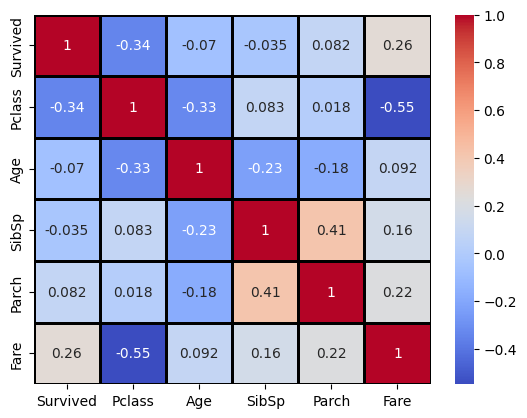

In [93]:
sns.heatmap(data_corr, cmap='coolwarm', annot=True , linewidths=1, linecolor='black')

In [94]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
print(data['Sex'])
print(type(data['Sex']))

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
<class 'pandas.core.series.Series'>


In [95]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [96]:
le4=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])

In [97]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [98]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [103]:
data_corr2=data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']].corr(method='spearman')

<Axes: >

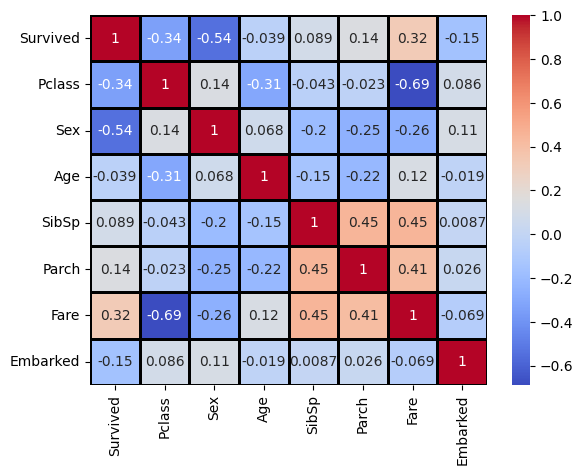

In [104]:
sns.heatmap(data_corr2,cmap='coolwarm', annot=True , linewidths=1, linecolor='black')

# 각 컬럼별 데이터 분포 파악 및 시각화

In [105]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [107]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

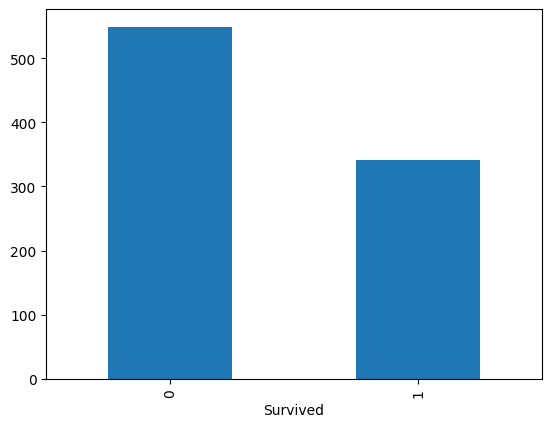

In [109]:
data['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass'>

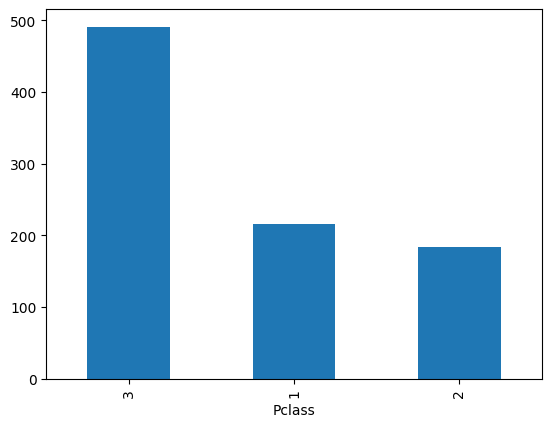

In [120]:
data['Pclass'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

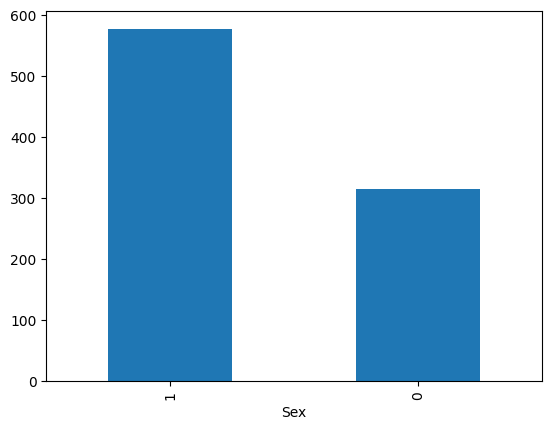

In [112]:
data['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

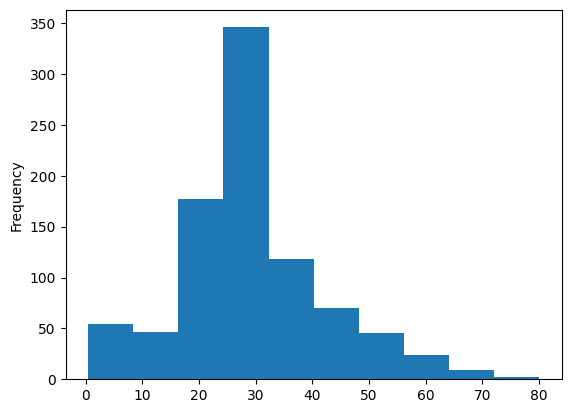

In [114]:
data['Age'].plot(kind='hist')

<Axes: xlabel='Age', ylabel='Count'>

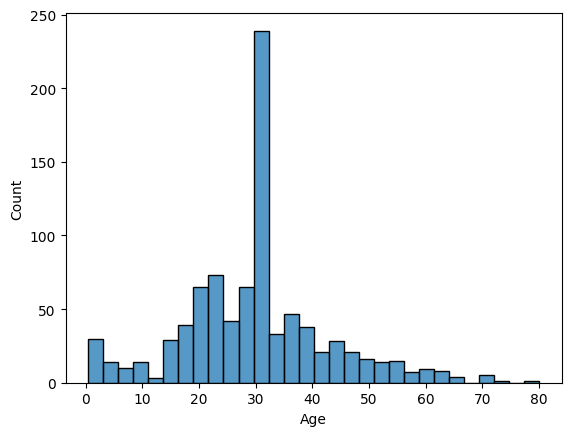

In [115]:
sns.histplot(data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

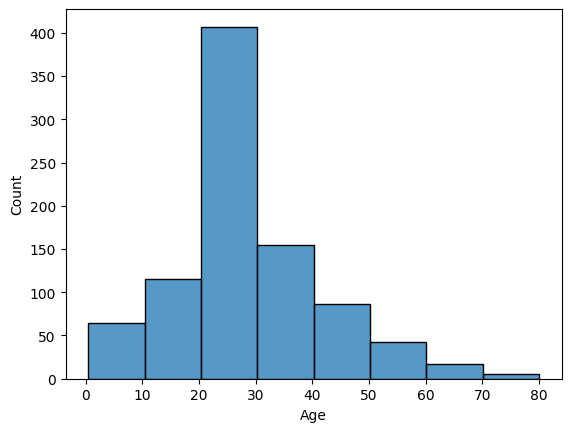

In [119]:
sns.histplot(data['Age'],bins=8)

In [121]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [122]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

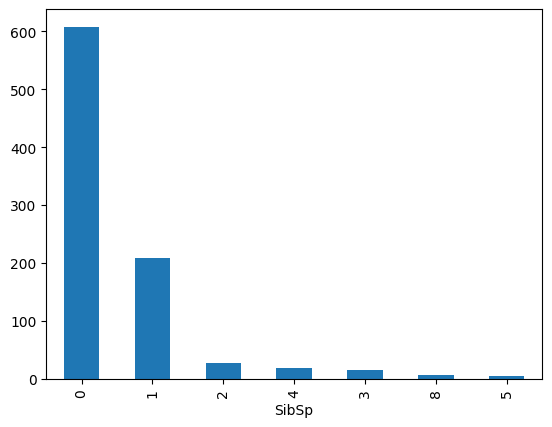

In [123]:
data['SibSp'].value_counts().plot(kind = 'bar')

In [124]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

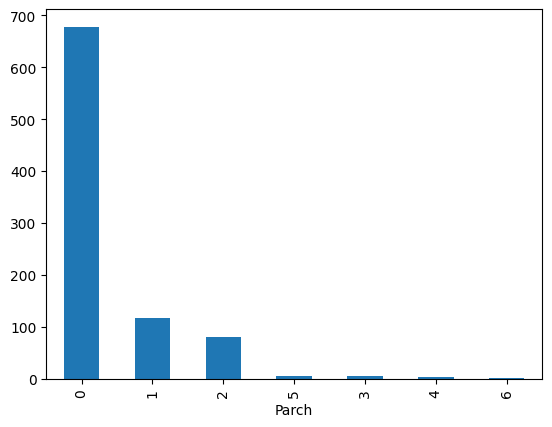

In [125]:
data['Parch'].value_counts().plot(kind='bar')

In [127]:
data['Fare'].value_counts

<bound method IndexOpsMixin.value_counts of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

<Axes: ylabel='Frequency'>

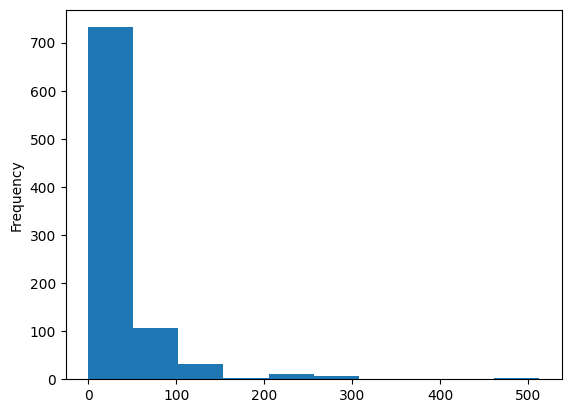

In [126]:
data['Fare'].plot(kind='hist')

<Axes: xlabel='Fare', ylabel='Count'>

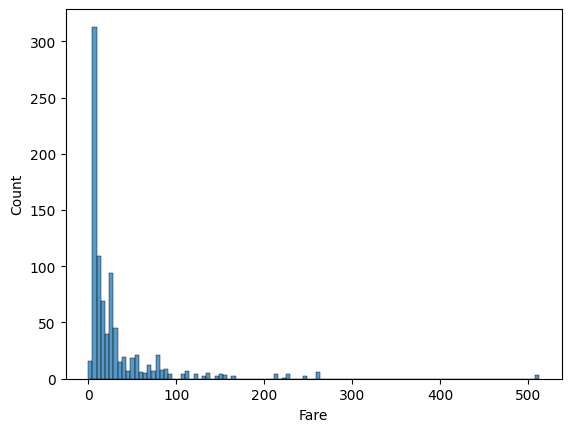

In [128]:
sns.histplot(data['Fare'])

<Axes: xlabel='Embarked'>

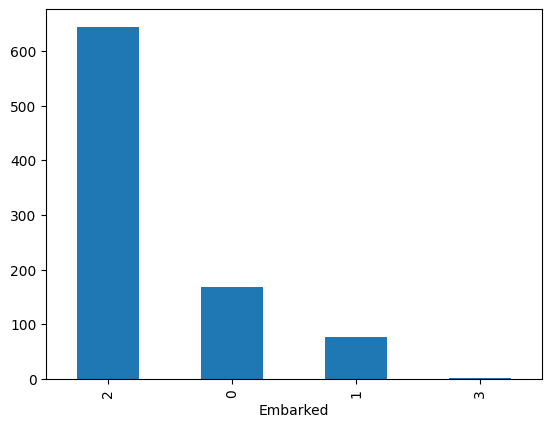

In [129]:
data["Embarked"].value_counts().plot(kind='bar')

In [130]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

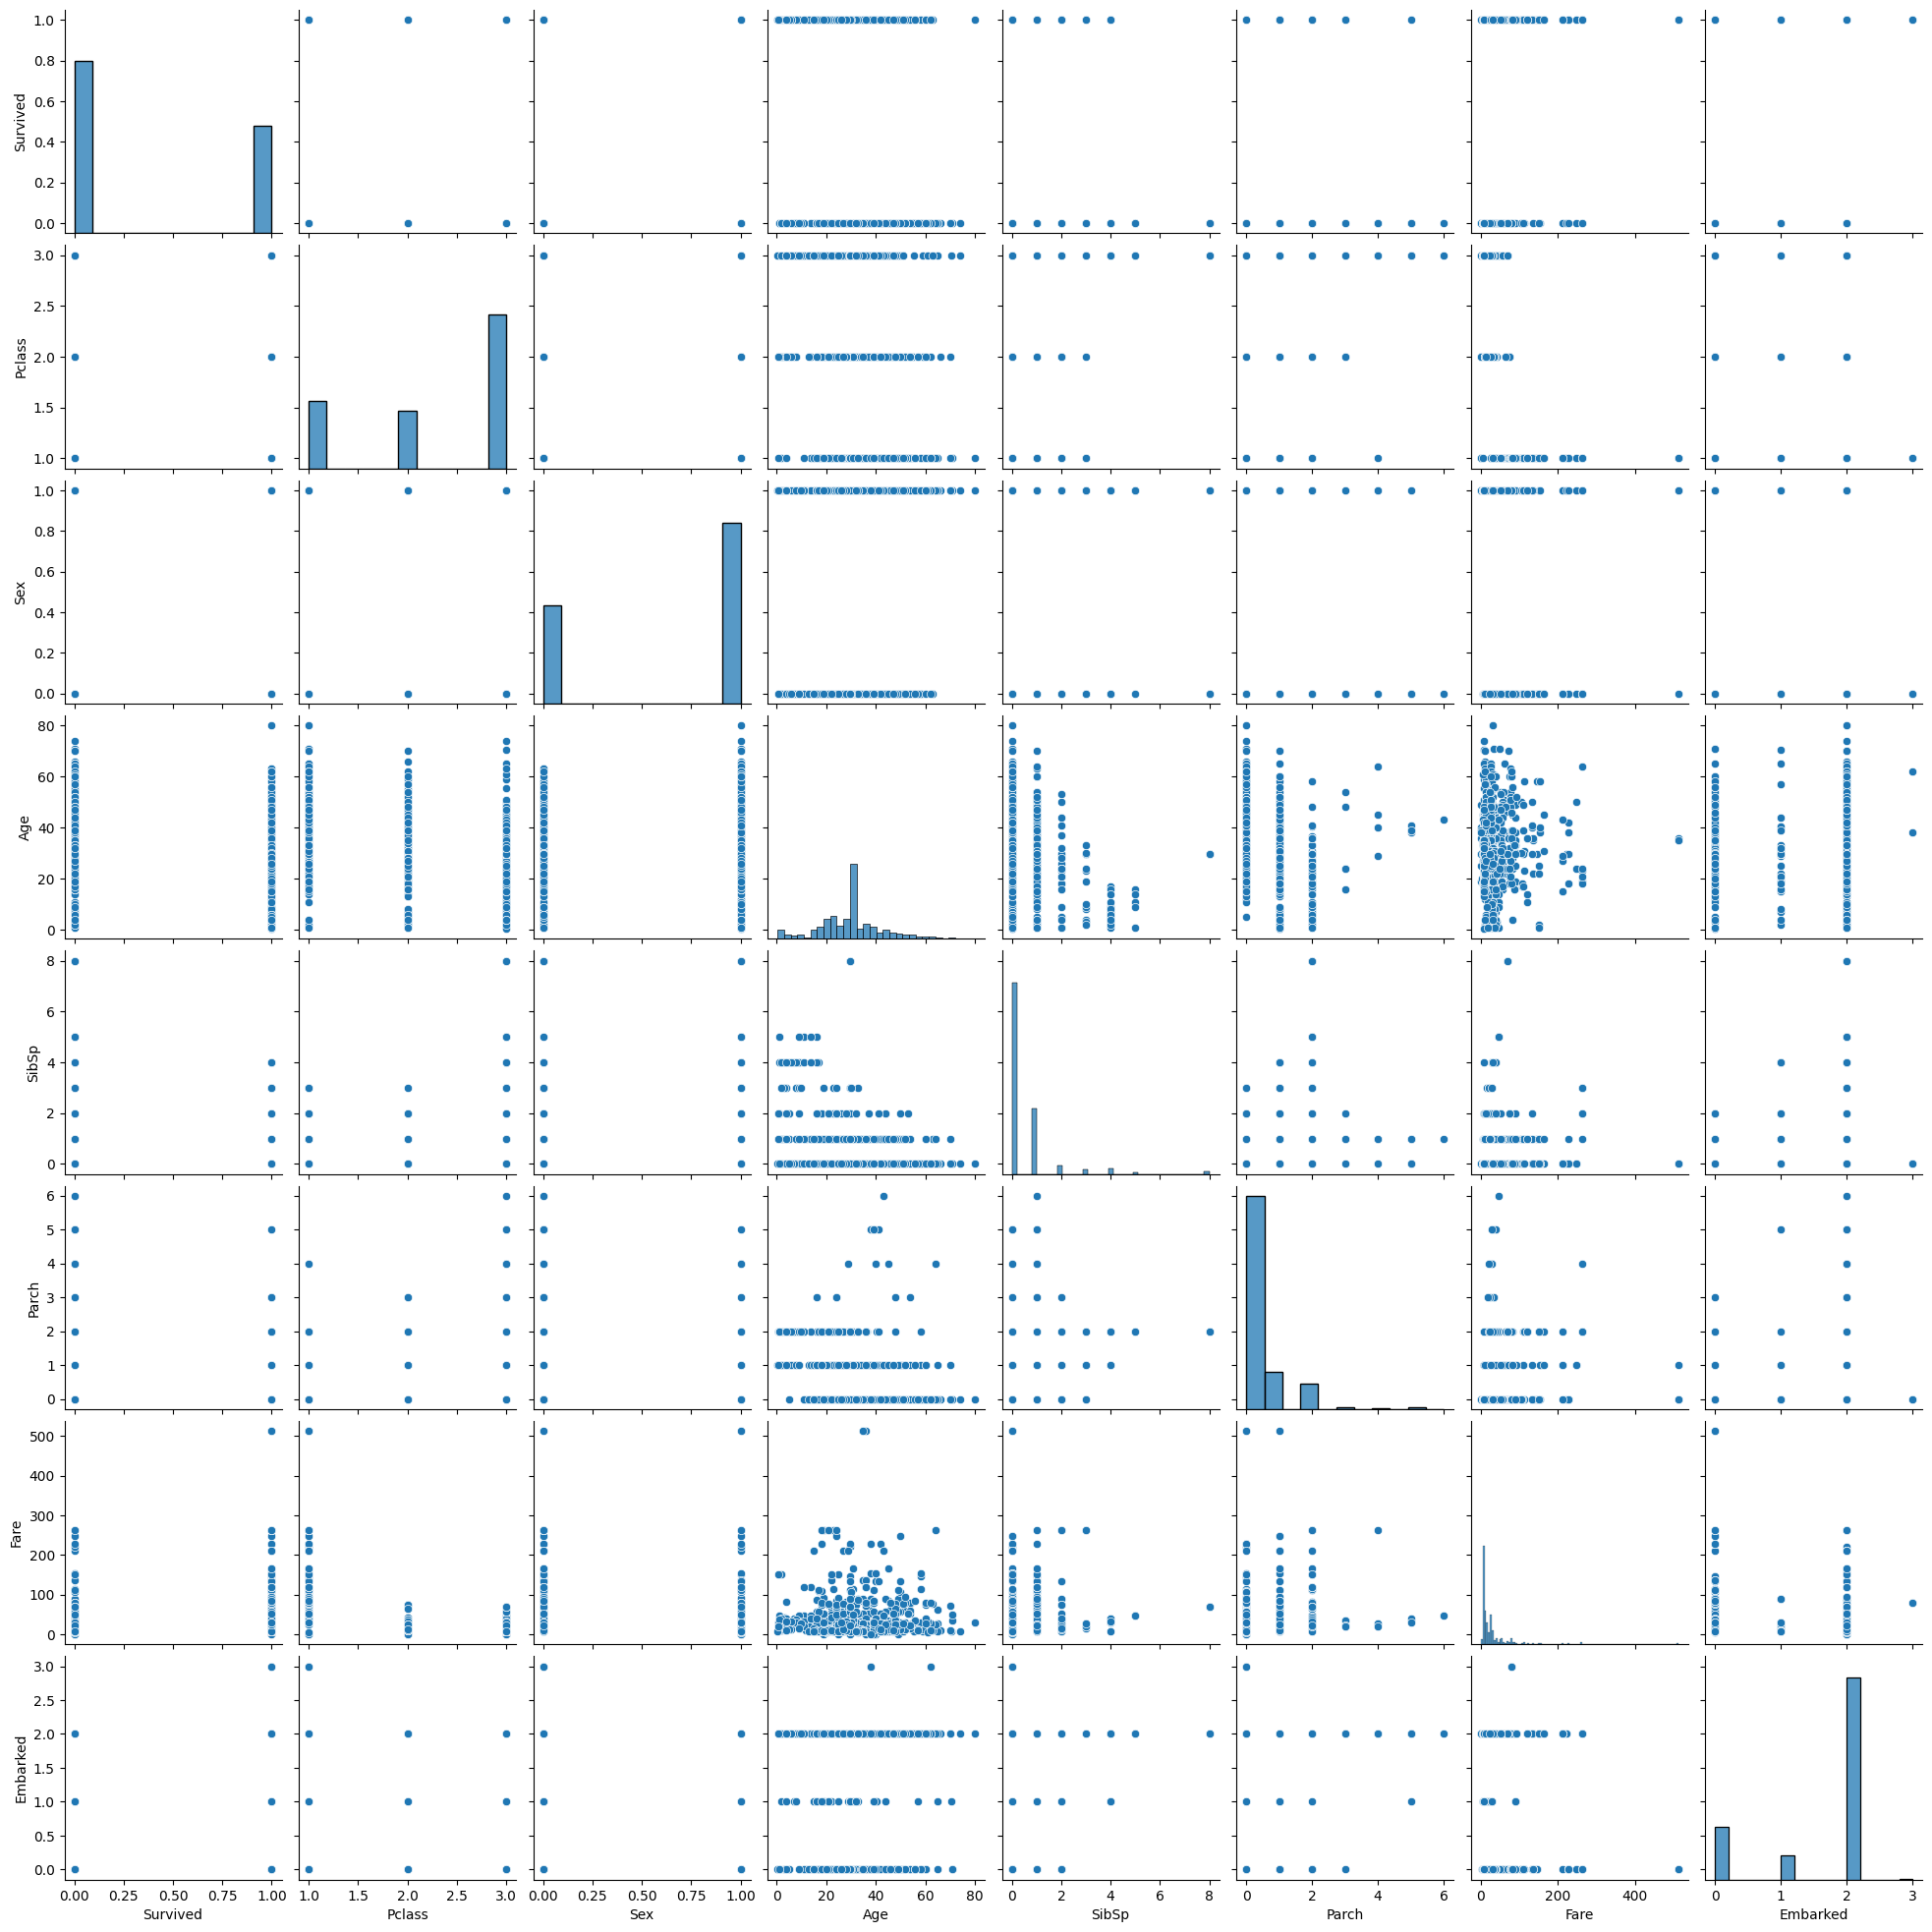

In [131]:
sns.pairplot(data)

## groupby로 독립변수와 종속변수간 규칙 찾기

In [132]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [133]:
data[['Survived', 'Pclass']].groupby('Pclass').value_counts(sort=False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

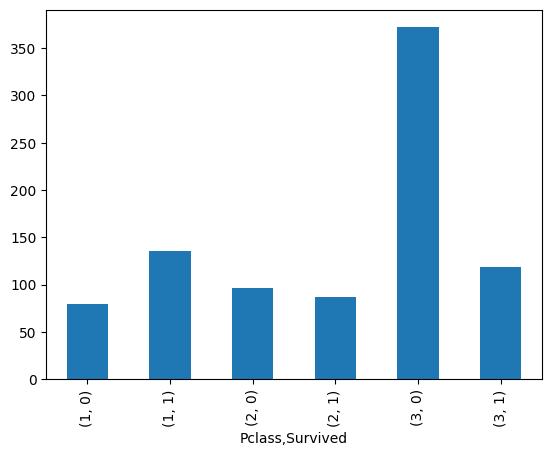

In [134]:
data[['Survived', 'Pclass']].groupby('Pclass').value_counts(sort=False).plot(kind='bar')

In [135]:
data[['Survived', 'Sex']].groupby('Sex').value_counts(sort=False)

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: count, dtype: int64

<Axes: xlabel='Sex,Survived'>

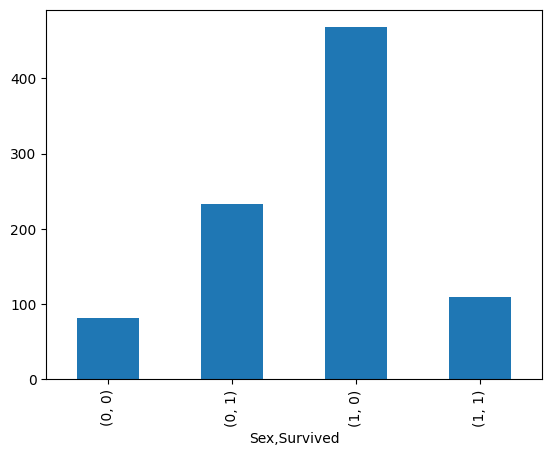

In [136]:
data[['Survived', 'Sex']].groupby('Sex').value_counts(sort=False).plot(kind='bar')

* 성별이 여성인 경우 생존율이 높음
* 성별이 남성인 경우 사망율이 높음

In [139]:
data[['Survived', 'SibSp']].groupby('SibSp').value_counts(sort=False)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

<Axes: xlabel='SibSp,Survived'>

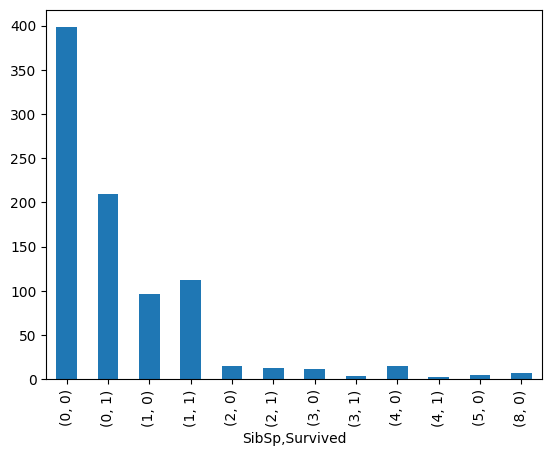

In [140]:
data[['Survived', 'SibSp']].groupby('SibSp').value_counts(sort=False).plot(kind='bar')

In [144]:
data.groupby('Embarked')['Survived'].value_counts(sort=False)

Embarked  Survived
0         0            75
          1            93
1         0            47
          1            30
2         0           427
          1           217
3         1             2
Name: count, dtype: int64

<Axes: xlabel='Embarked,Survived'>

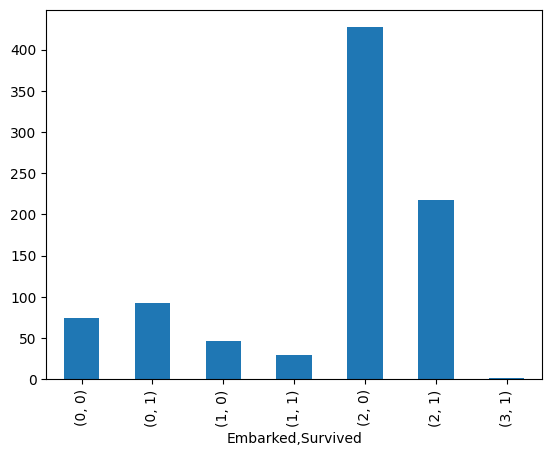

In [145]:
data.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind='bar')

# 연속형 데이터인 경우 구간화를 통해서 명목변수로 변환

In [146]:
data[['Survived', 'Age']].groupby('Age').value_counts(sort=False)

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: count, Length: 144, dtype: int64

---------------------------------------------------------------------------------------

조건문으로 Age 컬럼 구간화 하기

In [149]:
def ages(x):
    if 0<x<10:
        return "under10"
    elif 10<=x<20:
        return "10s"
    elif 20<=x<30:
        return "20s"
    elif 30<=x<40:
        return "30s"
    elif 40<=x<50:
        return "40s"
    elif 50<=x<60:
        return "50s"
    elif 60<=x<70:
        return "60s"
    elif 70<=x<80:
        return "70s"
    elif 80<=x<90:
        return "80s"

In [151]:
data['Age']=data['Age'].apply(ages)

In [152]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,20s,1,0,7.2500,2
1,1,1,0,30s,1,0,71.2833,0
2,1,3,0,20s,0,0,7.9250,2
3,1,1,0,30s,1,0,53.1000,2
4,0,3,1,30s,0,0,8.0500,2


<Axes: xlabel='Age,Survived'>

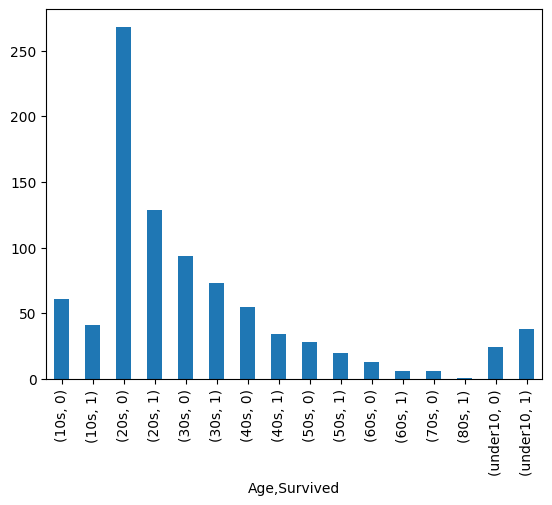

In [153]:
data[['Survived', 'Age']].groupby('Age').value_counts(sort=False).plot(kind='bar')

pclass별, 성별별 생존율

In [154]:
data.groupby(['Pclass','Sex'])['Survived'].value_counts(sort=False)

Pclass  Sex  Survived
1       0    0             3
             1            91
        1    0            77
             1            45
2       0    0             6
             1            70
        1    0            91
             1            17
3       0    0            72
             1            72
        1    0           300
             1            47
Name: count, dtype: int64

<Axes: xlabel='Pclass,Sex,Survived'>

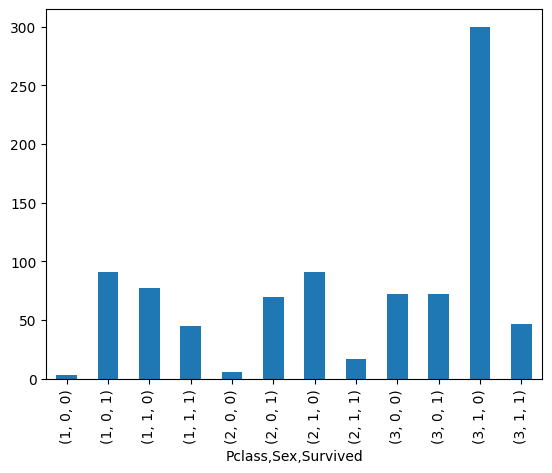

In [155]:
data.groupby(['Pclass','Sex'])['Survived'].value_counts(sort=False).plot(kind='bar')

In [ ]:
pclass별, 성별별, 나이별 생존율

In [156]:
data[['Pclass','Sex','Age','Survived']].groupby(['Pclass','Sex','Age']).value_counts(sort=False)

Pclass  Sex  Age      Survived
1       0    10s      1           13
             20s      0            1
                      1           24
             30s      1           27
             40s      1           13
                                  ..
3       1    50s      0            6
             60s      0            2
             70s      0            2
             under10  0           13
                      1            8
Name: count, Length: 70, dtype: int64

In [157]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,20s,1,0,7.2500,2
1,1,1,0,30s,1,0,71.2833,0
2,1,3,0,20s,0,0,7.9250,2
3,1,1,0,30s,1,0,53.1000,2
4,0,3,1,30s,0,0,8.0500,2


In [158]:
data=data.drop('Fare', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,20s,1,0,2
1,1,1,0,30s,1,0,0
2,1,3,0,20s,0,0,2
3,1,1,0,30s,1,0,2
4,0,3,1,30s,0,0,2


# Feature Engineering (변수 선택, 새로운 변수 생성)

In [159]:
data['Family']= data['SibSp']+data['Parch']


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family


In [160]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,1,20s,1,0,2,1
1,1,1,0,30s,1,0,0,1
2,1,3,0,20s,0,0,2,0
3,1,1,0,30s,1,0,2,1
4,0,3,1,30s,0,0,2,0


In [161]:
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,20s,2,1
1,1,1,0,30s,0,1
2,1,3,0,20s,2,0
3,1,1,0,30s,2,1
4,0,3,1,30s,2,0


# 카테고리 변수의 더미변수화 get_dummies

In [165]:
data = pd.get_dummies(data, columns=['Sex','Age','Embarked','Family'], drop_first=True)

# 종속변수(y)와 독립변수(x) 분리

In [166]:
X=data.drop('Survived', axis=1)
y=data['Survived']

In [167]:
X

,Pclass,Sex_1,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under10,...,Embarked_2,Embarked_3,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,3,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,False,False,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,3,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
887,1,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
888,3,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
889,1,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [168]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=8)

In [172]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.87      0.61      0.72       100

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.83      0.82      0.81       268



#### 1. 타이타닉 데이터 로딩
#### 2. 데이터 전처리(데이터 타입 변환, 결측치 처리, 이상값탐지)
#### 3. EDA(탐색적 데이터 분석 - 각 컬럼별 데이터 분포 value_counts, 그래프, 상관분석, groupby로 target변수(종속변수)와의 관계 분석)
#### 4. Feature Engineering - 변수 선택, 새로운 특성 생성, 카테고리 변수의 더미변수화/label encoding(문자->숫자)
#### 5. 최종 선택된 변수를 독립변수(X), 종속변수(y)로 나누기
#### 6. train_test_split을 이용해서 train(훈련용데이터),test(검증용데이터) 로 나눔 (홀드 아웃)
#### 7. 분류 알고리즘을 불러와서 훈련(학습) => 분류모델생성
#### 8. 모델의 성능 평가(accuracy_score 정확도)
#### 9. 모델 성능 개선 4~8반복 + 하이퍼파라미터 튜닝

In [ ]:
정확도 Accuracy: 정답을 정답, 오답을 오답으로 맞춘것

In [175]:
for ts in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=ts/10, random_state=8)
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train,y_train)
    pred=dtc.predict(X_test)
    print(ts/10, accuracy_score(y_test,pred))
    print(ts, classification_report(y_test,pred))

0.1 0.8
1               precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.69      0.78      0.74        32

    accuracy                           0.80        90
   macro avg       0.78      0.80      0.79        90
weighted avg       0.81      0.80      0.80        90

0.2 0.7988826815642458
2               precision    recall  f1-score   support

           0       0.80      0.89      0.84       108
           1       0.80      0.66      0.72        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

0.3 0.8208955223880597
3               precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.87      0.61      0.72       100

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.79       268
weighted avg  

# 하이퍼파라미터 튜닝으로 성능 개선하기

In [178]:
for i in range(1,15):
    dtc=DecisionTreeClassifier(max_depth=i,random_state=8)
    dtc.fit(X_train,y_train)
    pred=dtc.predict(X_test)
    print(i, accuracy_score(y_test,pred))
    print(i, classification_report(y_test,pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7985074626865671
3               precision    recall  f1-score   support

           0       0.77      0.96      0.86       168
           1       0.88      0.53      0.66       100

    accuracy                           0.80       268
   macro avg       0.83      0.74      0.76       268
weigh

In [180]:
dtc=DecisionTreeClassifier(max_depth=6,random_state=8)
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.835820895522388
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       168
           1       0.91      0.62      0.74       100

    accuracy                           0.84       268
   macro avg       0.86      0.79      0.81       268
weighted avg       0.85      0.84      0.83       268



# criterion: 분류 알고리즘 변경하면서 최적화

In [181]:
for i in range(1,15):
    dtc=DecisionTreeClassifier(criterion='entropy',  max_depth=i,random_state=8)
    dtc.fit(X_train,y_train)
    pred=dtc.predict(X_test)
    print(i, accuracy_score(y_test,pred))
    print(i, classification_report(y_test,pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7835820895522388
3               precision    recall  f1-score   support

           0       0.80      0.88      0.84       168
           1       0.75      0.63      0.68       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weigh

# 의사결정나무 (DecisionTree) 시각화

In [183]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.4491784793814433, 0.9666666666666667, 'Sex_1 <= 0.5\nentropy = 0.964\nsamples = 623\nvalue = [381, 242]'),
 Text(0.18846649484536082, 0.9, 'Pclass <= 2.5\nentropy = 0.813\nsamples = 227\nvalue = [57, 170]'),
 Text(0.31882248711340205, 0.9333333333333333, 'True  '),
 Text(0.10309278350515463, 0.8333333333333334, 'Family_3 <= 0.5\nentropy = 0.275\nsamples = 127\nvalue = [6, 121]'),
 Text(0.05154639175257732, 0.7666666666666667, 'Pclass <= 1.5\nentropy = 0.214\nsamples = 118\nvalue = [4, 114]'),
 Text(0.020618556701030927, 0.7, 'Age_50s <= 0.5\nentropy = 0.108\nsamples = 70\nvalue = [1, 69]'),
 Text(0.010309278350515464, 0.6333333333333333, 'entropy = 0.0\nsamples = 60\nvalue = [0, 60]'),
 Text(0.030927835051546393, 0.6333333333333333, 'Family_1 <= 0.5\nentropy = 0.469\nsamples = 10\nvalue = [1, 9]'),
 Text(0.020618556701030927, 0.5666666666666667, 'Embarked_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.010309278350515464, 0.5, 'entropy = 1.0\nsamples = 2\nvalu

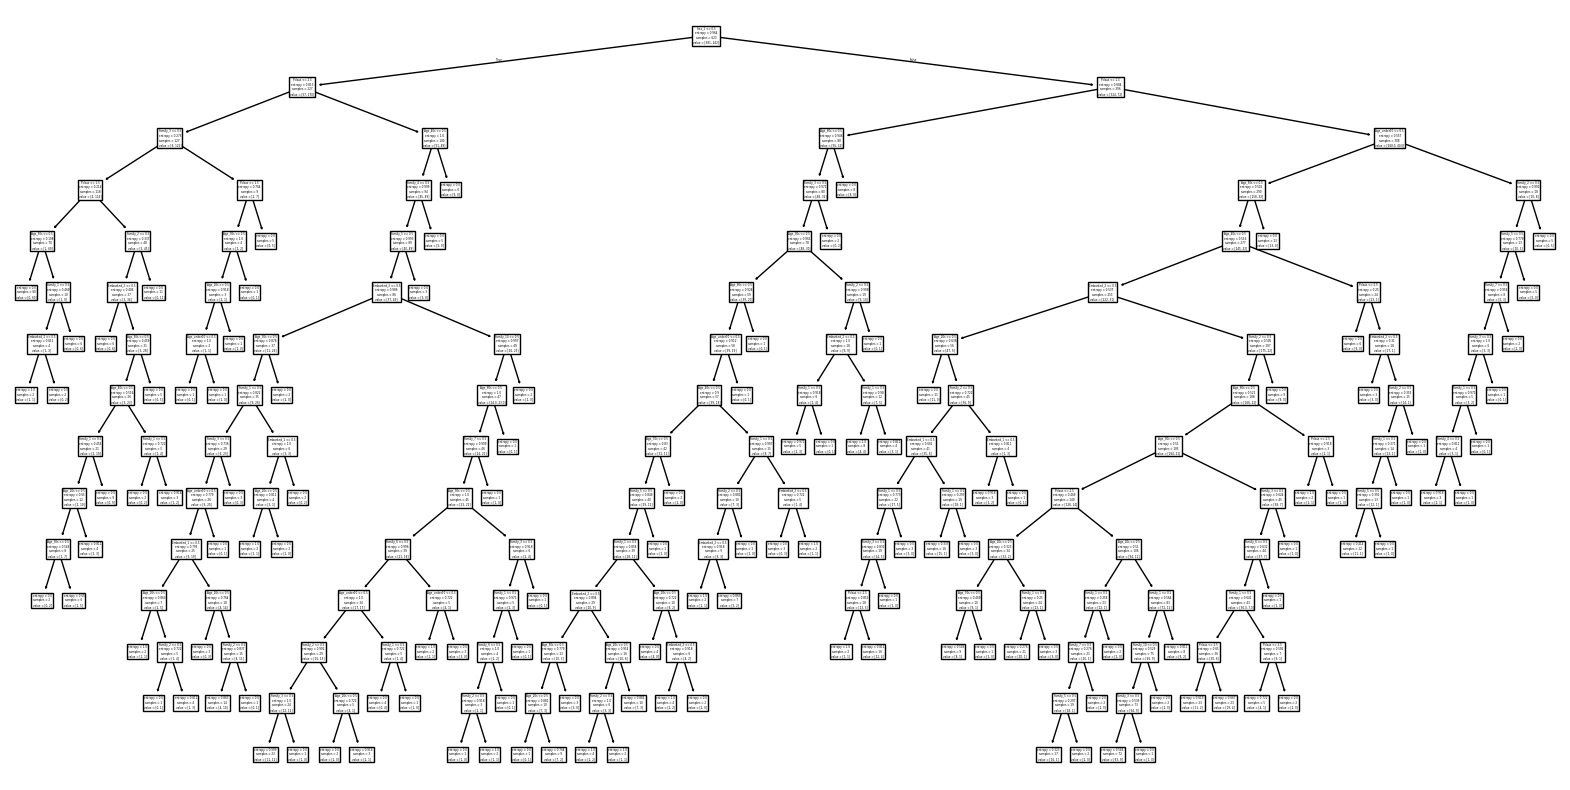

In [187]:
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=X_train.columns)